In [1]:
# /analyticsoutput/clr/
# dataloc='/home/htic/qd3_data/output/clr/GammaCorrection_BGRemoval_Rotation_Amal/'
dataloc='/data/keerthi/brainpubdata/'
# 20Aug2024_FB34_CorrectedImages

In [2]:
biosampleid='142'

In [3]:
from matplotlib import pyplot as plt
from trs_functions import CropROI, RegImage
import glob
import os
from PIL import Image
from skimage import transform
from tqdm import tqdm

In [4]:
import SimpleITK as sitk

In [5]:
im142 = sitk.ReadImage(dataloc+'/142/FB34_nisl_128mpp_gray.nii.gz')

In [6]:
im142.GetSize()

(625, 625, 707)

In [13]:
im142_part2=im142[:,:,482:]

In [14]:
sitk.WriteImage(im142_part2,dataloc+'/142/FB34_nisl_128mpp_gray_p2.mhd')

In [7]:
im142_p2_edited = sitk.ReadImage(dataloc+'/142/FB34_nisl_128mpp_gray_p2_moved.mhd')

In [8]:
im142_p2_edited.GetSize()

(625, 625, 225)

In [10]:
# im142_part2.GetSize()

In [11]:
# im142_part2[:,:,:10]=im142_p2_edited[:,:,:10]

In [12]:
# im142[:,:,482:]=im142_p2_edited[:,:,:]

In [14]:
arr142 = sitk.GetArrayFromImage(im142)

In [15]:
arrp2e = sitk.GetArrayFromImage(im142_p2_edited)

In [16]:
arr142.shape

(707, 625, 625)

In [17]:
arrp2e.shape

(225, 625, 625)

In [19]:
arr142[482:,:,:]=arrp2e

In [20]:
im142e = sitk.GetImageFromArray(arr142)

In [22]:
im142e.CopyInformation(im142)

In [23]:
sitk.WriteImage(im142e,dataloc+'/142/FB34_nisl_128mpp_gray_edited.mhd')

In [4]:
imgdir = {
    '244':dataloc+'/244/22Aug2024_FB85_CorrectedImages',
    '141':dataloc+'/141/20Aug2024_FB40_CorrectedImages/',
    '213':dataloc+'/213/26Aug2024_FB62_NISSL_CorrectedImages/',
    '222':dataloc+'/222/16Aug2024_FB74_CorrectedImages/',
    '142':dataloc+'/142/20Aug2024_FB34_CorrectedImages/',
}

brainname = {
    '141':'FB40',
    '142': 'FB34',
    '213': 'FB62',
    '222': 'FB74',
    '244': 'FB85',
}

In [5]:
refdict={}
for fn in glob.glob(imgdir[biosampleid]+'/*'):
    bn = os.path.basename(fn)
    if "aligned" in bn:
        secno = bn.split('_')[0]
        refdict[secno]=fn

In [6]:
imgsize = 4000
if biosampleid in ('142','244'):
    imgsize = 5000

In [7]:
nr = imgsize//4
nc = imgsize//4

In [8]:
# refdict

In [9]:
secno = 535
secnos_ok = [
727, 451, 637, 445, 502, 655, 1147 , 1150,1315, 1462, 1486, 1489, 1495, 1507, 1519, 1753, 502,
457, 406, 409
]

secnos_almost_ok = [
 658, 757, 1339, 1342
]

secnos_fail_cases = [
 460, 643, 1384, 1441, 1588, 1933, 535
]

# no black for test (ok)
# 478

# no black for test (fail)


In [ ]:
# not masked  (slicenos)
# 252, 242 ,224, 219, 485, 

# wrong mask
# 315, 317, 319, 325, 326, 329, 330, 351, 533, 463,   417,413, 408, 407, 403, 420, 463, 601, 645, 

# incomplete annot
# 464, 434, 518, 523, 532, 

# doubtful
# 523, 510

# misnumbered
# 456

# misaligned
# 416, 


In [15]:
351*3

1053

In [10]:
secno//3 # , 242*3+1

178

In [11]:
def workerfunc(secno:int):

    if str(secno) in refdict: # and int(secno) in nisl_dict:
        secim = RegImage(refdict[str(secno)]) #,refroi) #,90) # clockwise 
        arr = secim.arr.copy()
        
        if 'masked' not in os.path.basename(refdict[str(secno)]):
            # dsim = Image.open(dsdict[str(secno)])
            # downsampled_size = dsim.size
            # sz = secim.arr.shape
            
            # secim.contentpercent = downsampled_size[0]/sz[0]*downsampled_size[1]/sz[1]
            msk = secim.get_blackmask()>0
            
            for ch in range(3):
                arr[...,ch][msk]=255
                
        # lastsec = secim.arr[::res//16,::res//16,:] # 16 to 64 mpp
        img64 = transform.resize(arr,(nr,nc),order=1, preserve_range=True).astype(arr.dtype)
        # img128 = transform.resize(arr,(nr//2,nc//2),order=1, preserve_range=True).astype(arr.dtype)
        # return img64, img128, secno
        plt.figure()        
        plt.subplot(1,2,1)
        plt.imshow(secim.arr)
        plt.title(str(secno))
        
        plt.subplot(1,2,2)
        plt.imshow(arr)
        plt.show()
        
    # return None, None, secno

  0%|                                                                                                         | 0/20 [00:00<?, ?it/s]

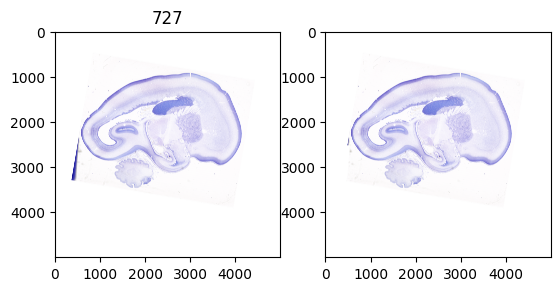

  5%|████▊                                                                                            | 1/20 [00:11<03:42, 11.72s/it]

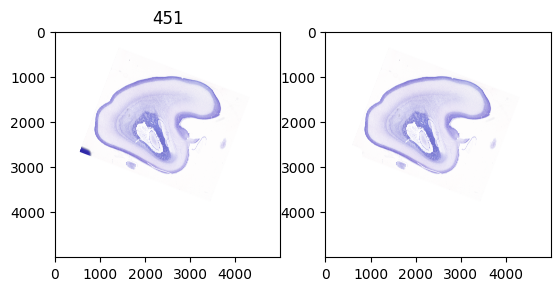

 10%|█████████▋                                                                                       | 2/20 [00:21<03:13, 10.74s/it]

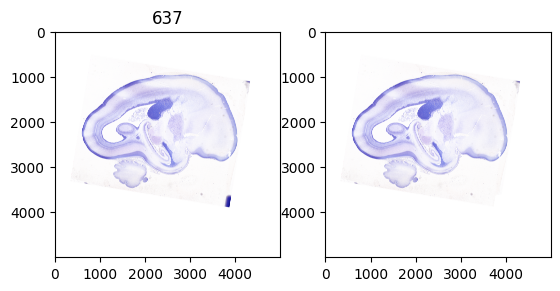

 15%|██████████████▌                                                                                  | 3/20 [00:31<02:57, 10.44s/it]

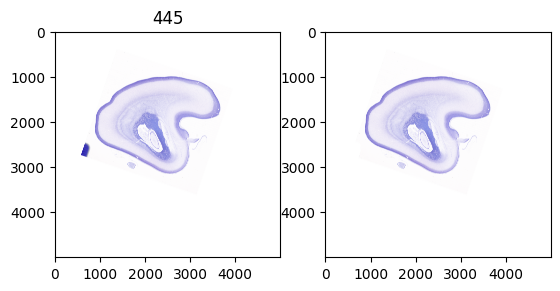

 20%|███████████████████▍                                                                             | 4/20 [00:41<02:41, 10.12s/it]

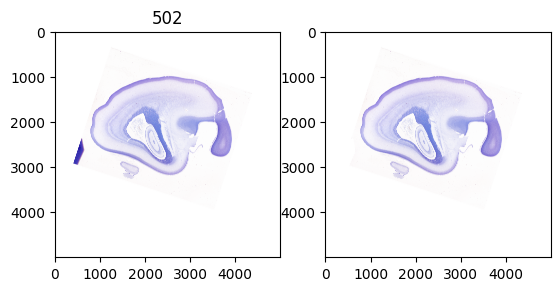

 25%|████████████████████████▎                                                                        | 5/20 [00:51<02:28,  9.92s/it]

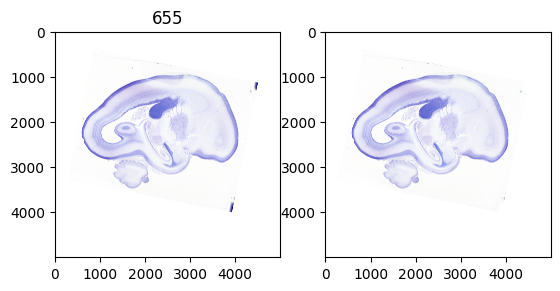

 30%|█████████████████████████████                                                                    | 6/20 [01:00<02:17,  9.82s/it]

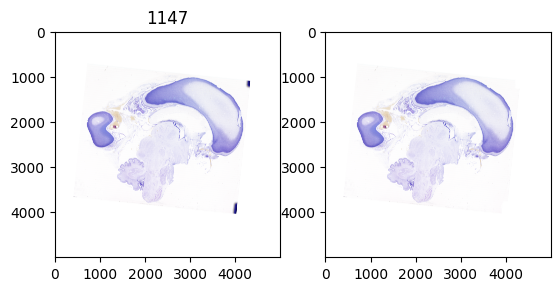

 35%|█████████████████████████████████▉                                                               | 7/20 [01:10<02:07,  9.79s/it]

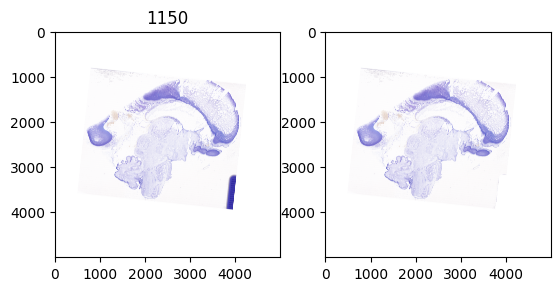

 40%|██████████████████████████████████████▊                                                          | 8/20 [01:20<01:57,  9.80s/it]

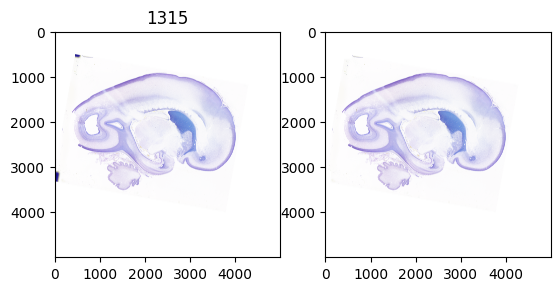

 45%|███████████████████████████████████████████▋                                                     | 9/20 [01:30<01:48,  9.83s/it]

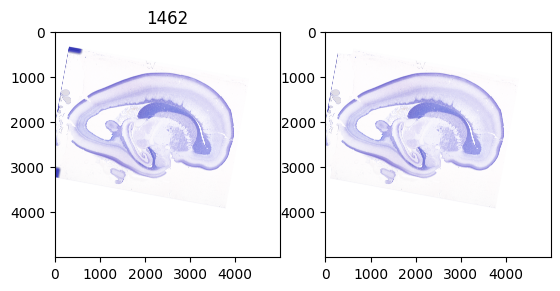

 50%|████████████████████████████████████████████████                                                | 10/20 [01:39<01:37,  9.74s/it]

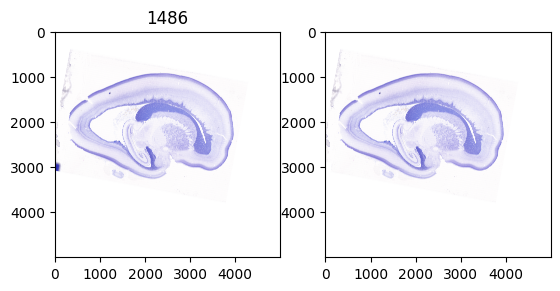

 55%|████████████████████████████████████████████████████▊                                           | 11/20 [01:49<01:27,  9.69s/it]

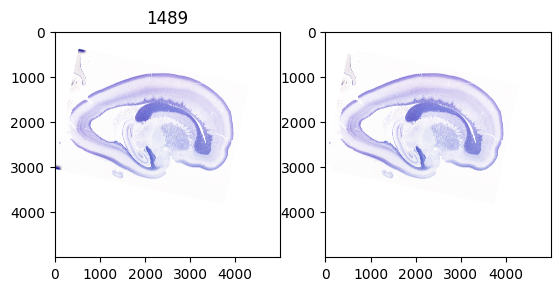

 60%|█████████████████████████████████████████████████████████▌                                      | 12/20 [01:58<01:17,  9.69s/it]

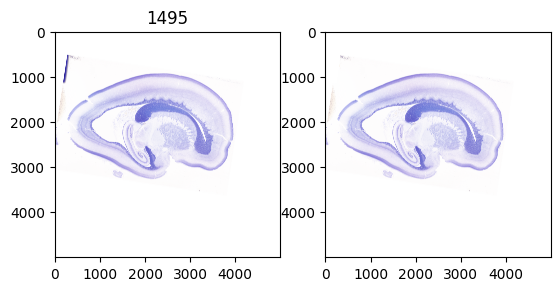

 65%|██████████████████████████████████████████████████████████████▍                                 | 13/20 [02:08<01:07,  9.67s/it]

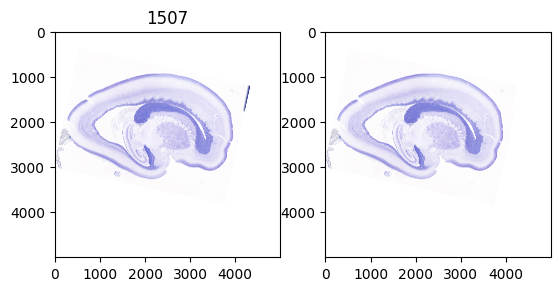

 70%|███████████████████████████████████████████████████████████████████▏                            | 14/20 [02:18<00:57,  9.64s/it]

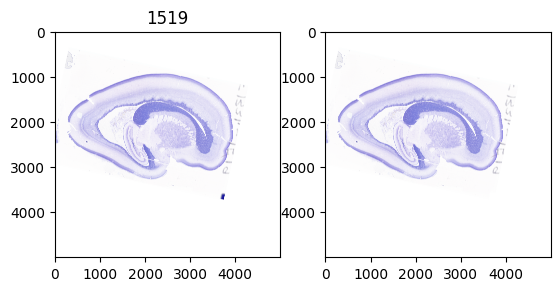

 75%|████████████████████████████████████████████████████████████████████████                        | 15/20 [02:27<00:48,  9.65s/it]

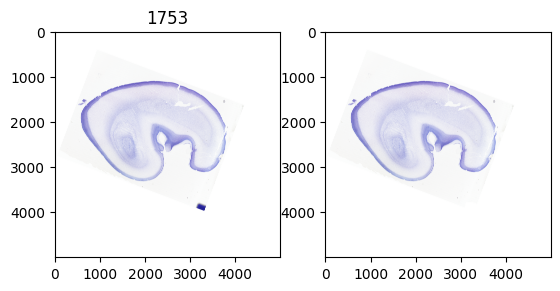

 80%|████████████████████████████████████████████████████████████████████████████▊                   | 16/20 [02:37<00:38,  9.74s/it]

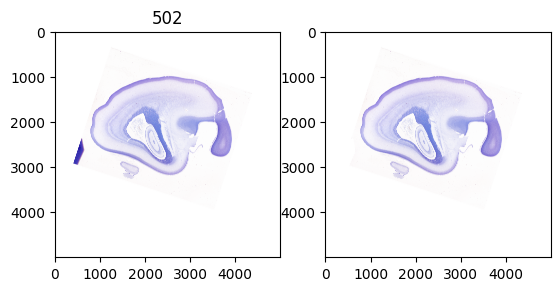

 85%|█████████████████████████████████████████████████████████████████████████████████▌              | 17/20 [02:48<00:29,  9.91s/it]

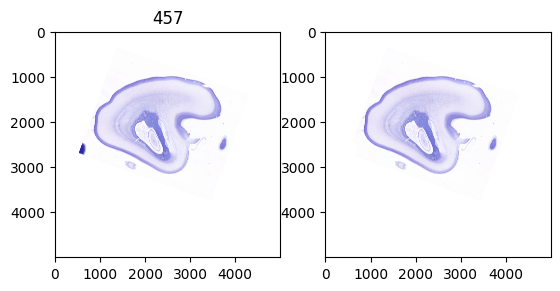

 90%|██████████████████████████████████████████████████████████████████████████████████████▍         | 18/20 [02:57<00:19,  9.89s/it]

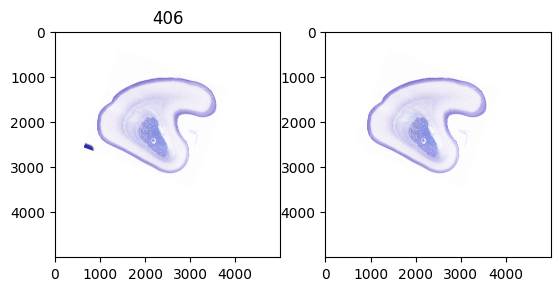

 95%|███████████████████████████████████████████████████████████████████████████████████████████▏    | 19/20 [03:07<00:09,  9.88s/it]

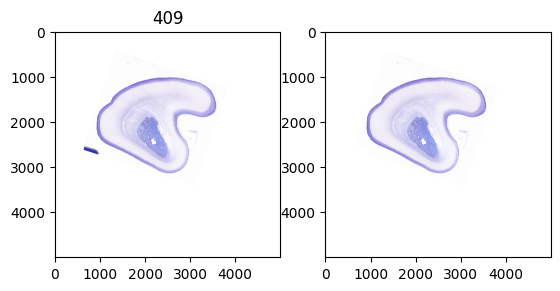

100%|████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [03:17<00:00,  9.87s/it]


In [203]:
for secno in tqdm(secnos_ok):
    workerfunc(secno)

  0%|                                                                                                          | 0/4 [00:00<?, ?it/s]

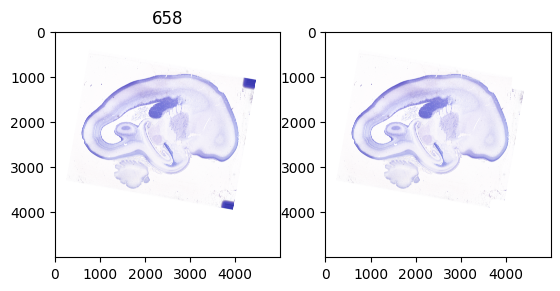

 25%|████████████████████████▌                                                                         | 1/4 [00:08<00:24,  8.02s/it]

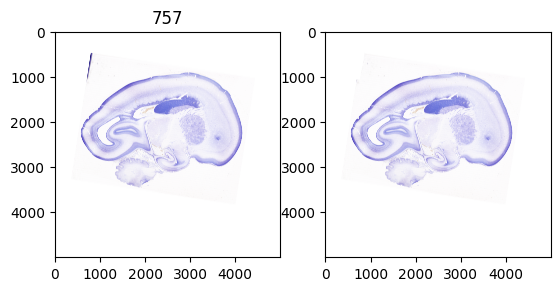

 50%|█████████████████████████████████████████████████                                                 | 2/4 [00:16<00:16,  8.00s/it]

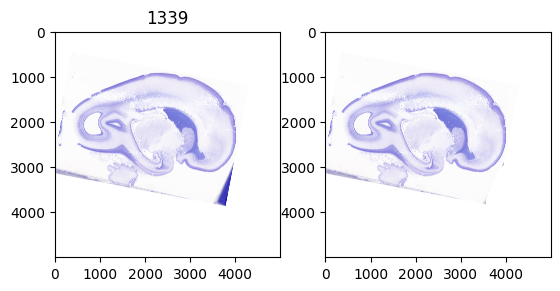

 75%|█████████████████████████████████████████████████████████████████████████▌                        | 3/4 [00:23<00:07,  7.99s/it]

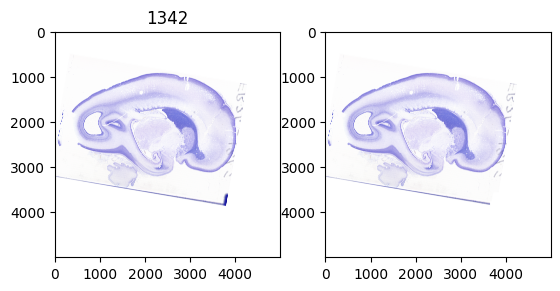

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:32<00:00,  8.00s/it]


In [12]:
for secno in tqdm(secnos_almost_ok):
    workerfunc(secno)

  0%|                                                                                                          | 0/7 [00:00<?, ?it/s]

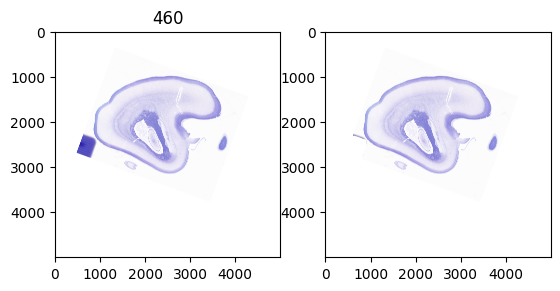

 14%|██████████████                                                                                    | 1/7 [00:08<00:48,  8.12s/it]

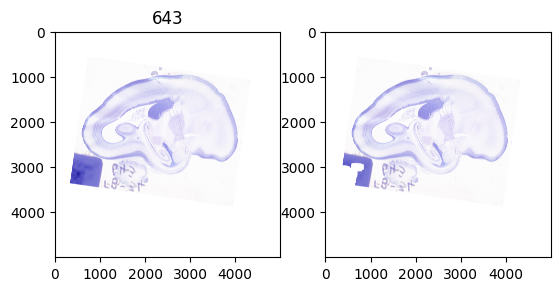

 29%|████████████████████████████                                                                      | 2/7 [00:16<00:40,  8.08s/it]

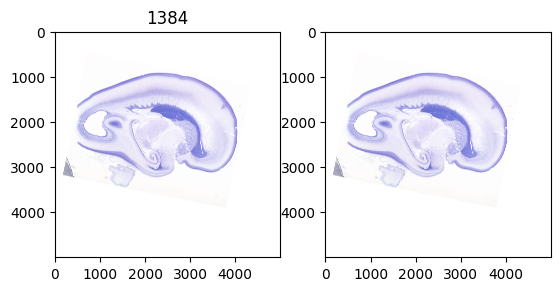

 43%|██████████████████████████████████████████                                                        | 3/7 [00:24<00:32,  8.06s/it]

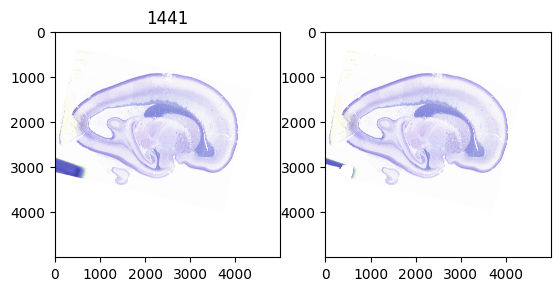

 57%|████████████████████████████████████████████████████████                                          | 4/7 [00:32<00:24,  8.05s/it]

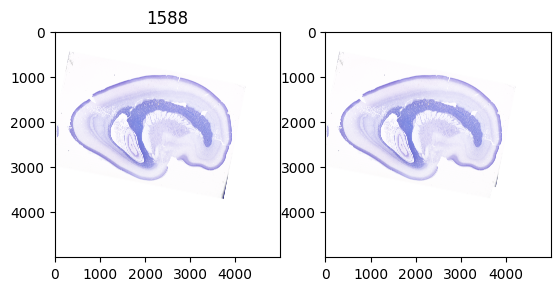

 71%|██████████████████████████████████████████████████████████████████████                            | 5/7 [00:40<00:16,  8.04s/it]

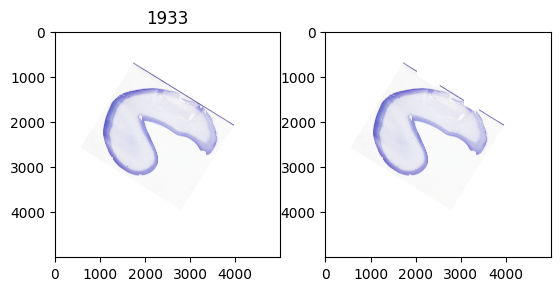

 86%|████████████████████████████████████████████████████████████████████████████████████              | 6/7 [00:48<00:08,  8.03s/it]

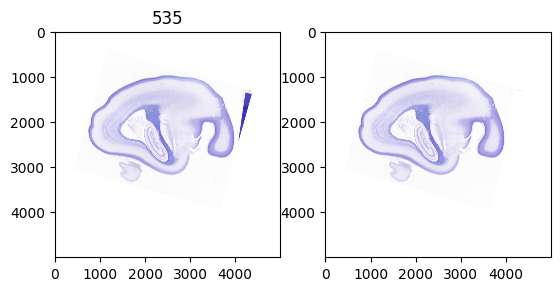

100%|██████████████████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:56<00:00,  8.03s/it]


In [13]:
for secno in tqdm(secnos_fail_cases):
    workerfunc(secno)

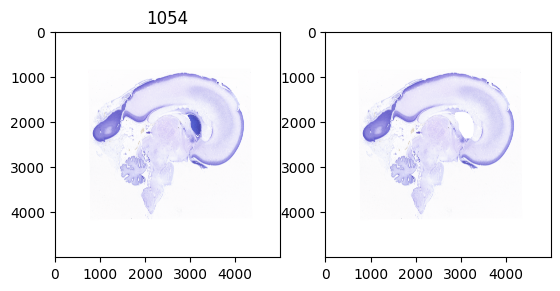

In [16]:
workerfunc(1054)

# debug

In [37]:
# img64,img128,secno = workerfunc(637)

In [19]:
from trs_functions import binary_dilation, binary_erosion, square, area_opening


In [20]:
secno = 1054
secim = RegImage(refdict[str(secno)])
nr,nc,d = secim.arr.shape
img = secim.arr[::4,::4]
# blk = (img[:,:,0]<20) & (img[:,:,1]<20) & (img[:,:,2]<20)
blk0 = (img.mean(axis=2)<150) & (img[...,2]<210) & (img[:,:,0] < 90)

blk0 = area_opening(blk0,100)

blk = binary_dilation(blk0,square(29))
    

blk = transform.resize(blk,(nr,nc),order=0)

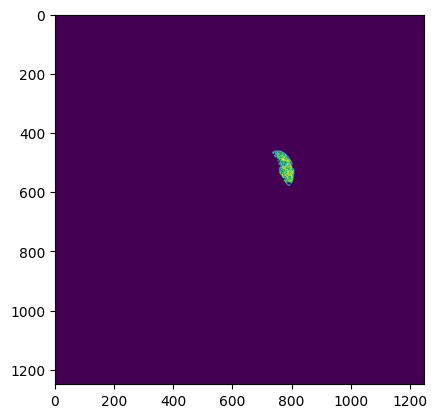

In [21]:
plt.imshow(blk0)

In [25]:
# img128.shape

In [23]:
blk0.sum()

3203

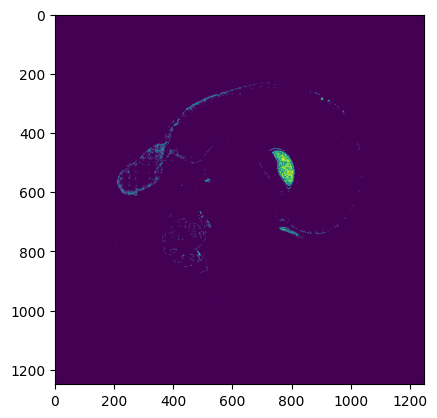

In [24]:
plt.imshow((img[...,0]<90))

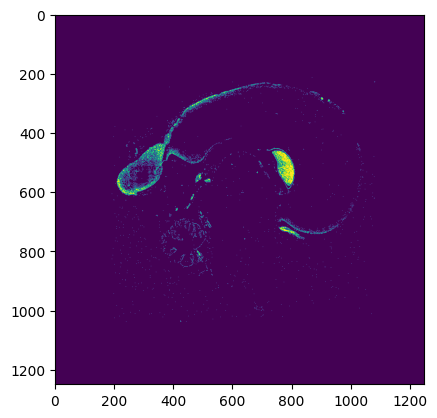

In [26]:
plt.imshow((img[...,2]<210)) #  & 

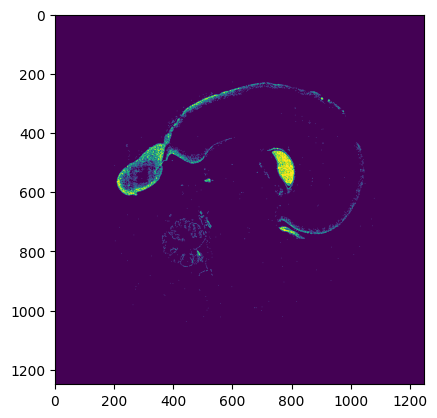

In [27]:
plt.imshow(img.mean(axis=2)<150)